# Final Project Schedule
## Choose the dataset
Pick one of the following datasets, derive two research question for it and create two figures that help explore the questions. Here are the datasets:
* [Ocean Ship Logbooks (1750-1850)](https://www.kaggle.com/cwiloc/climate-data-from-ocean-ships)
* [Chocolate Bar Ratings](https://www.kaggle.com/rtatman/chocolate-bar-ratings)
* [Open Exoplanet Catalogue](https://www.kaggle.com/mrisdal/open-exoplanet-catalogue)
* [U.S. Pollution Data](https://www.kaggle.com/sogun3/uspollution)
* [Who eats the food we grow?](https://www.kaggle.com/dorbicycle/world-foodfeed-production)
* [Red Wine Quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)
* [Climate Change: Earth Surface Temperature Data](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data)
* [World Happiness Report](https://www.kaggle.com/unsdsn/world-happiness)
* [Wildlife Trade Database](https://www.kaggle.com/cites/cites-wildlife-trade-database)
* [Volcano Eruptions Global Distribution](https://www.kaggle.com/texasdave/volcano-eruptions)
* [Where it Pays to Attend College](https://www.kaggle.com/wsj/college-salaries)
* [Student Alcohol Consumption](https://www.kaggle.com/uciml/student-alcohol-consumption)
* [Honeybees and Neonic Pesticides](https://www.kaggle.com/kevinzmith/honey-with-neonic-pesticide)
* [Avocado Prices](https://www.kaggle.com/neuromusic/avocado-prices)
* [Insect Light Trap](https://www.kaggle.com/University-of-Copenhagen/insect-light-trap)
* [Craft Beer Dataset](https://www.kaggle.com/nickhould/craft-cans)
* [Weather Archive Jena](https://www.kaggle.com/pankrzysiu/weather-archive-jena)
* [World Glacier Inventory](https://www.kaggle.com/nsidcorg/glacier-inventory)
* [Video Game Sales](https://www.kaggle.com/gregorut/videogamesales)
* [Carbon Dioxide Levels in Atmospheres](https://www.kaggle.com/ucsandiego/carbon-dioxide)
* [Game of Thrones Battles](https://www.kaggle.com/mylesoneill/game-of-thrones)
* [Carbon Emissions from Electricity Production](https://www.kaggle.com/txtrouble/carbon-emissions)
* [Oil Pipeline Accidents, 2010-2016](https://www.kaggle.com/usdot/pipeline-accidents)
* [Mushroom Classification](https://www.kaggle.com/uciml/mushroom-classification)
* [Countries of the World](https://www.kaggle.com/fernandol/countries-of-the-world)
* [Age of Empires 2 Match Data](https://www.kaggle.com/jerkeeler/age-of-empires-ii-de-match-data) 

Question 1: 
    
Which houses have participated in the highest number of battles and what are the win rates of each house in battles in Game of Thrones?
- To answer this question, "battles.csv" data from the Game of Thrones battles database is used. 

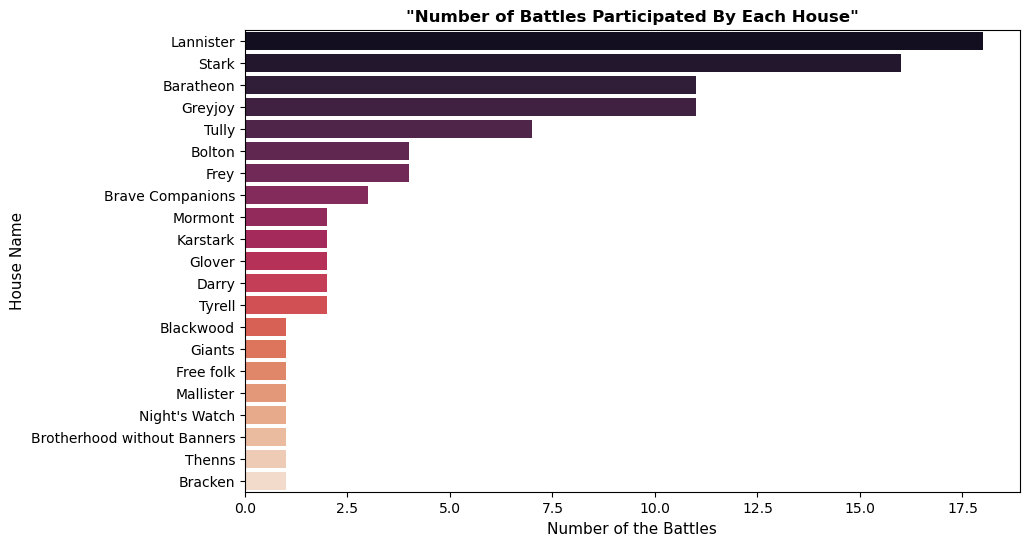

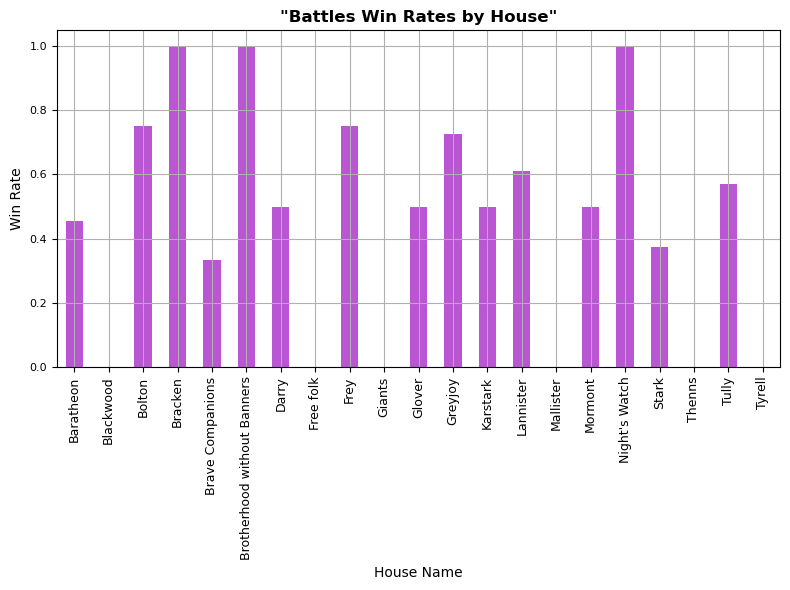

In [29]:
### Import the packages that are required
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset
battles_df = pd.read_csv("battles.csv")

### Create a list of attacker and defenders column names: 
attacker_columns = ["attacker_1", "attacker_2", "attacker_3", "attacker_4"]
defender_columns = ["defender_1", "defender_2", "defender_3", "defender_4"]

### Count the number of battles each house participated in as an attacker and defenders
attacker_counts = battles_df[attacker_columns].stack().value_counts()
defender_counts = battles_df[defender_columns].stack().value_counts()
house_counts = attacker_counts.add(defender_counts, fill_value=0).sort_values(ascending=False)

### Create a bar plot of the house participated 
plt.figure(figsize=(10, 6))
sns.barplot(x=house_counts.values, y=house_counts.index, palette="rocket")
plt.xlabel("Number of the Battles",fontsize=11)
plt.ylabel("House Name", fontsize=11)
plt.title('"Number of Battles Participated By Each House"', fontsize=12, fontweight="bold")
plt.show()

### Count the number of wins for each house
attacker_wins = battles_df[battles_df["attacker_outcome"] == "win"][attacker_columns].stack().value_counts()
defender_wins = battles_df[battles_df["attacker_outcome"] == "loss"][defender_columns].stack().value_counts()

### Count the number of battles fought by each house
battles_attacker = battles_df[attacker_columns].stack().value_counts()
battles_defender = battles_df[defender_columns].stack().value_counts()
total_battles = battles_attacker.add(battles_defender, fill_value=0)

### Calculate the win rates for each house
attacker_win_rate = attacker_wins / total_battles
attacker_win_rate = attacker_win_rate.fillna(0)      # Use the fillna() method to replace the NaN values with 0
defender_win_rate = defender_wins / total_battles
defender_win_rate = defender_win_rate.fillna(0)     # Use the fillna() method to replace the NaN values with 0
win_rates = pd.concat([attacker_win_rate, defender_win_rate], axis=1).fillna(0).sum(axis=1)
ax = win_rates.plot(kind="bar", figsize=(8, 6), color=["mediumorchid"], grid=True)
ax.set_title('"Battles Win Rates by House"', fontsize=12, fontweight="bold")
ax.set_xlabel("House Name", fontsize=10)
ax.set_ylabel("Win Rate", fontsize=10)
ax.tick_params(axis="x", labelrotation=90, labelsize=9)
ax.tick_params(axis="y", labelsize=8)
plt.tight_layout()
plt.show()

Overview of Figures:
Figure 1: A bar plot showing the number of battles participated by each house.
Figure 2: A bar plot showing the win rates of each house in battles.
    
Explanation of Figures:
    
Figure 1 answers the first question by showing the number of battles participated by each house. 
The x-axis shows the number of battles and the y-axis shows the house name. 
The bar plot shows that the Lannister house has participated in the most number of battles, 
followed by the stark and Baratheon houses.

Figure 2 answers the second research question by showing the win rates of each house in battles. 
The x-axis shows the house name and the y-axis shows the win rate.The win rate is defined as the number of battles won by a 
particular house divided by the total number of battles participated in. 
Since the maximum win rate a house can have is 1 (i.e., winning all the battles participated in), 
any house with a win rate of 1 is considered to have the 100% win rate. 
Overall, these figures give us a better understanding of the participation 
and performance of each house in battles in Game of Thrones.

Question 2:
What is the death count by gender and nobility status across the 5 different books 
namely:GoT, CoK, SoS, FfC and DwD from "A Song of Ice and Fire" series?
 - To answer this question, "character-deaths.csv" data from the Game of Thrones battles database is used. 

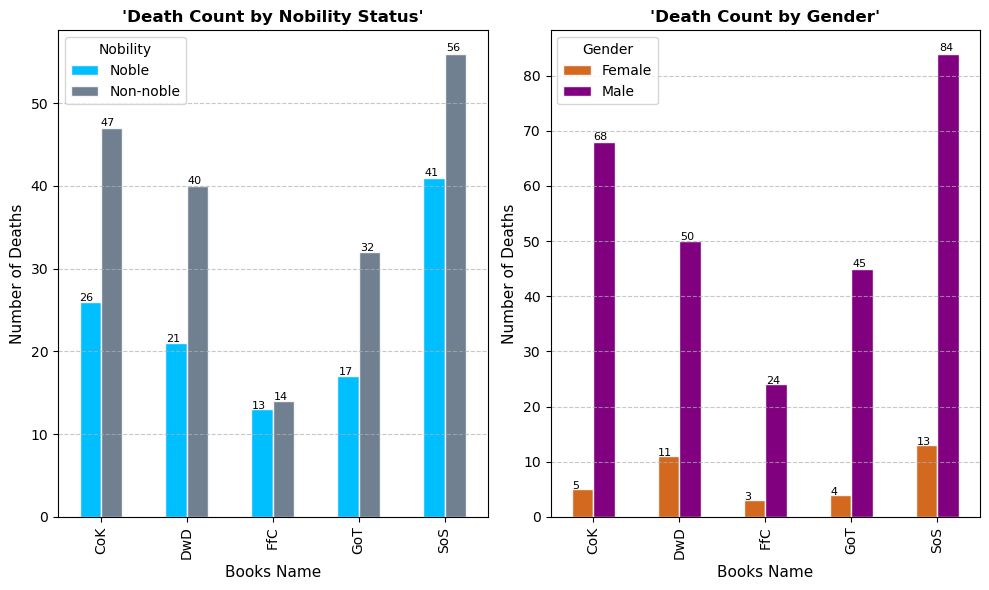

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data
deaths_df = pd.read_csv("character-deaths.csv")

### Define dictionaries to map book numbers to book names, gender values, and nobility values
book_dict = {1: "GoT", 2: "CoK", 3: "SoS", 4: "FfC", 5: "DwD"}
gender_dict = {0: "Female", 1: "Male"}
nobility_dict = {0: "Non-noble", 1: "Noble"}

### Replace the book numbers, gender values, and nobility values with their corresponding names using the map function
deaths_df["Book of Death"] = deaths_df["Book of Death"].map(book_dict)
deaths_df["Gender"] = deaths_df["Gender"].map(gender_dict)
deaths_df["Nobility"] = deaths_df["Nobility"].map(nobility_dict)

### Group the data by book and nobility/gender, then count the number of deaths
nobility_deaths = deaths_df.groupby(["Book of Death", "Nobility"])["Name"].count().reset_index()
gender_deaths = deaths_df.groupby(["Book of Death", "Gender"])["Name"].count().reset_index()

### Reshape the data to create separate columns for noble and non-noble deaths using pivot()
nobility_deaths = nobility_deaths.pivot(index="Book of Death", columns="Nobility", values="Name")
nobility_deaths = nobility_deaths.rename(columns=nobility_dict)
nobility_deaths = nobility_deaths.fillna(0) #Replace any NaN values with 0

### Reshape the data to create separate columns for male and female deaths
gender_deaths = gender_deaths.pivot(index="Book of Death", columns="Gender", values="Name")
gender_deaths = gender_deaths.rename(columns=gender_dict)
gender_deaths = gender_deaths.fillna(0)

### Create a bar chart to visualize the results
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
nobility_deaths.plot(kind="bar", ax=ax[0], color=["deepskyblue", "slategray"], edgecolor="whitesmoke")
gender_deaths.plot(kind="bar", ax=ax[1], color=["chocolate", "purple"], edgecolor="whitesmoke")
ax[0].set_title("'Death Count by Nobility Status'", fontsize=12, fontweight="bold")
ax[1].set_title("'Death Count by Gender'", fontsize=12, fontweight="bold")
ax[0].set_xlabel("Books Name", fontsize=11)
ax[1].set_xlabel("Books Name", fontsize=11)
ax[0].set_ylabel("Number of Deaths", fontsize=11)
ax[1].set_ylabel("Number of Deaths", fontsize=11)
ax[0].grid(axis="y", linestyle="--", alpha=0.7)  # Add thin gridlines
ax[1].grid(axis="y", linestyle="--", alpha=0.7)

### Add labels on top of each bar
#Convert the height of the bar to an integer and add as text to the annotation
for v in ax[0].patches:
    ax[0].annotate(str(int(v.get_height())), (v.get_x() * 1.005, v.get_height() * 1.005), fontsize=8)
    
for v in ax[1].patches:
    ax[1].annotate(str(int(v.get_height())), (v.get_x() * 1.005, v.get_height() * 1.005), fontsize=8)

plt.tight_layout()
plt.show()



Explanation of the figures:
    
Two bar charts are created side by side. One bar chart displays the death count by nobility status 
for each book in the series, and the other bar chart displays the death count by gender for each book.
The x-axis of both charts represents the book names, and the y-axis represents the number of deaths. 
The blue bars represent deaths of noble characters, and the gray bars represent deaths of non-noble 
characters in the nobility status chart. 
In the gender chart, purple bars represent deaths of male characters, and chocolate colors bars represent deaths of female.
Annotations on top of each bar display the exact death count for each category.
From the charts,the most deaths occur in the third book, "SoS" in both charts. 